In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
cat = Table.read('../data/mycats/HSCwide12H+Yang_Ngal_min_4.fits')
print len(cat), 'objects in catalog'
print np.unique(cat['group_id']).size, 'galaxy groups\n'
print '*** column names ***'
for col in cat.colnames:
    print col

408 objects in catalog
59 galaxy groups

*** column names ***
id
parent
tract
patch
ra
dec
group_id
bright
match_sep
z
Ngal
Mh_Lest
Mh_Mest
g-r
Mr


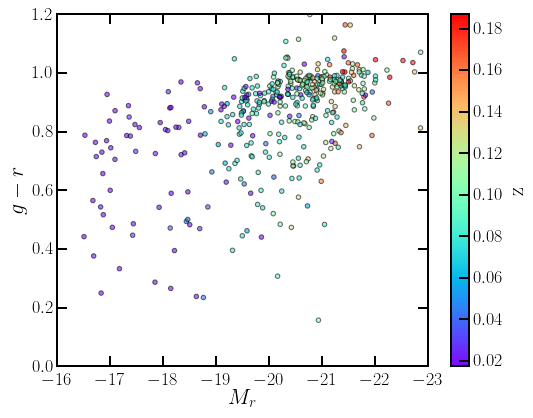

In [3]:
f1, a1 = plt.subplots(figsize=(8,6))
cmap = plt.cm.rainbow
sc = a1.scatter(cat['Mr'], cat['g-r'], c=cat['z'], marker='o', alpha=0.6, cmap=cmap, rasterized=True)
cbar = f1.colorbar(sc)
cbar.set_label('z')
cbar.solids.set_edgecolor("face")
a1.set_xlabel('$M_r$')
a1.set_ylabel('$g-r$')
a1.set_ylim(ymax=1.2)
a1.set_xlim(xmin=-23)
a1.invert_xaxis()

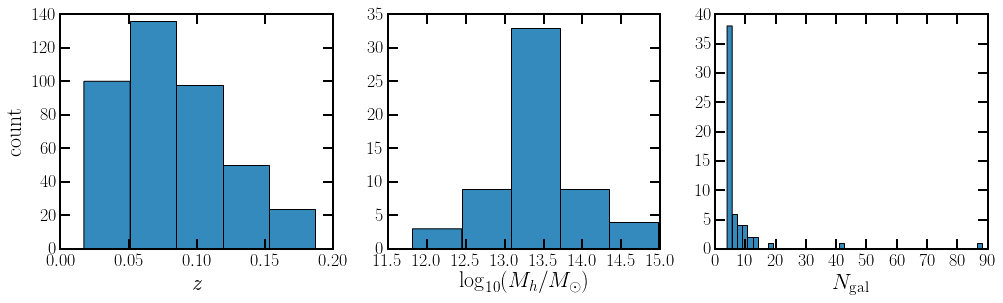

In [4]:
f2, a2 = plt.subplots(1,3,figsize=(16,4))
a2[0].hist(cat['z'],bins=5)
a2[0].set_xlabel('$z$')
a2[0].set_ylabel('count')
mass = [] 
Ngal = []
for group_id in np.unique(cat['group_id']):
    cut = cat['group_id']==group_id
    mass.append(cat[cut]['Mh_Lest'][0])
    Ngal.append(cat[cut]['Ngal'][0])
mass = np.array(mass)
Ngal = np.array(Ngal)
a2[1].hist(mass[mass>5], bins=5)
a2[1].set_xlabel('$\log_{10}(M_h/M_\odot)$')
a2[2].hist(Ngal, bins=50)
a2[2].set_xlabel('$N_\mathrm{gal}$');